Yassin Mamdouh 120210002

Ahmed Medhat 120210063

In [20]:
import cv2
import numpy as np


In [21]:
from google.colab import files
uploaded = files.upload()


Saving download (2).jpeg to download (2) (4).jpeg
Saving download (2) (1).jpeg to download (2) (1) (2).jpeg
Saving download (2) (2).jpeg to download (2) (2) (2).jpeg


In [22]:
query_img = cv2.imread("download (2) (2) (1).jpeg", cv2.IMREAD_GRAYSCALE)
target_img = cv2.imread("download (2) (3).jpeg", cv2.IMREAD_GRAYSCALE)

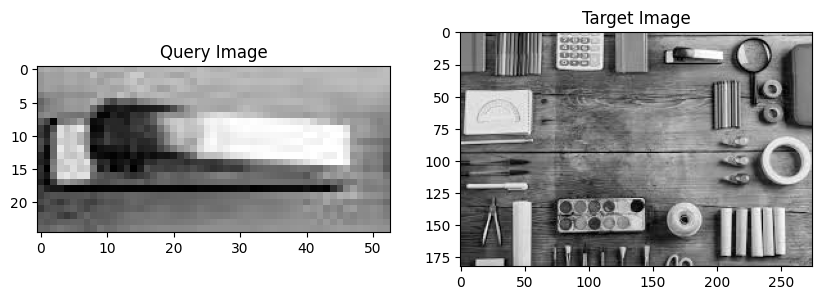

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(query_img, cmap='gray')
plt.title('Query Image')

plt.subplot(1, 2, 2)
plt.imshow(target_img, cmap='gray')
plt.title('Target Image')

plt.show()


In [28]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(query_img, None)
kp2, des2 = sift.detectAndCompute(target_img, None)

In [33]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

matched_kp = [kp2[m.trainIdx] for m in good_matches]

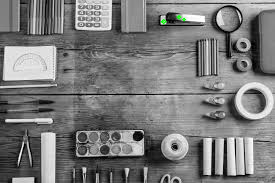

In [34]:
from google.colab.patches import cv2_imshow
output_img = cv2.cvtColor(target_img, cv2.COLOR_GRAY2BGR)
output_img = cv2.drawKeypoints(
    output_img,
    matched_kp,
    None,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

cv2.imwrite("output.jpg", output_img)
cv2_imshow(output_img)
